In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from matplotlib.patches import Patch
import bened as ben

# GAMMA XDVR

## CARICAMENTO DATI DA FILE E DIVISIONE CANALI

In [2]:
#giorno2
americio = uproot.open('group23\\10min-americio-gr23\\RAW\\DataR_10min-americio-gr23.root')
sodio = uproot.open('group23\\10min-sodio-gr23-SOGLIA\\RAW\\DataR_10min-sodio-gr23-SOGLIA.root')
europio = uproot.open('group23\\20min-europio-gr23\\RAW\\DataR_20min-europio-gr23.root')
back2 = uproot.open('group23\\30min-background-gr23\\RAW\\DataR_30min-background-gr23.root')
#giorno3
autunite = uproot.open('group23\\15min-autunite-gr23\\RAW\\DataR_15min-autunite-gr23.root')
enea = uproot.open('group23\\15min-Enea-water-gr23\\RAW\\DataR_15min-Enea-water-gr23.root')
porcini = uproot.open('group23\\15min-porcini-mushrooms-gr23\\RAW\\DataR_15min-porcini-mushrooms-gr23.root')
cement = uproot.open('group23\\15min-portland-cement-gr23\\RAW\\DataR_15min-portland-cement-gr23.root')
potassio = uproot.open('group23\\15min-potassio-gr23\\RAW\\DataR_15min-potassio-gr23.root')
zirconio = uproot.open('group23\\15min-zirconium-oxide-gr23\\RAW\\DataR_15min-zirconium-oxide-gr23.root')
back3 = uproot.open('group23\\15min-background-gr23-giorno3\\RAW\\DataR_15min-background-gr23.root')
#radon
exposed = uproot.open('group23\\30min-exposed-radon-gr23\\RAW\\DataR_30min-exposed-radon-gr23.root')
unexposed =uproot.open('group23\\30min-non-exposed-radon-gr23\\RAW\\DataR_30min-non-exposed-radon-gr23.root')
calibrated = uproot.open('group23\\30min-calibrated-radon-gr23\\RAW\\DataR_30min-calibrated-radon-gr23.root')

In [3]:
# time_europio = np.asarray(europio['Data_R;6']['Timestamp'].array(), dtype=np.float64)
# time_europio.max()

In [4]:
energy_americio = np.asarray(americio['Data_R;3']['Energy'].array(), dtype=np.float64)
canaliAM = np.asarray(americio['Data_R;3']['Channel'].array(), dtype=np.int64)

energy_sodio = np.asarray(sodio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliNA = np.asarray(sodio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_europio = np.asarray(europio['Data_R;6']['Energy'].array(), dtype=np.float64)
canaliEU = np.asarray(europio['Data_R;6']['Channel'].array(), dtype=np.int64)

energy_autunite = np.asarray(autunite['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliAUT = np.asarray(autunite['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_enea = np.asarray(enea['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliENEA = np.asarray(enea['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_porcini = np.asarray(porcini['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPORCINI = np.asarray(porcini['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_cement = np.asarray(cement['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliCEMENTO = np.asarray(cement['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_potassio = np.asarray(potassio['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliPOTASSIO = np.asarray(potassio['Data_R;4']['Channel'].array(), dtype=np.int64)

energy_zirconio = np.asarray(zirconio['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliZIRCONIO = np.asarray(zirconio['Data_R;5']['Channel'].array(), dtype=np.int64)

fondo2giorno = np.asarray(back2['Data_R;4']['Energy'].array(), dtype=np.float64)
canaliback2 = np.asarray(back2['Data_R;4']['Channel'].array(), dtype=np.int64)

fondo3giorno = np.asarray(back3['Data_R;5']['Energy'].array(), dtype=np.float64)
canaliback3 = np.asarray(back3['Data_R;5']['Channel'].array(), dtype=np.int64)

energy_exposed = np.asarray(exposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliexp = np.asarray(exposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_unexposed = np.asarray(unexposed['Data_R;9']['Energy'].array(), dtype=np.float64)
canaliunexp = np.asarray(unexposed['Data_R;9']['Channel'].array(), dtype=np.int64)

energy_calibrated = np.asarray(calibrated['Data_R;9']['Energy'].array(), dtype=np.float64)
canalical = np.asarray(calibrated['Data_R;9']['Channel'].array(), dtype=np.int64)

In [5]:
# Separa i dati in due array distinti per ogni canale (0 e 1)
americio_ch0 = energy_americio[canaliAM == 0]
americio_ch1 = energy_americio[canaliAM == 1]

sodio_ch0 = energy_sodio[canaliNA == 0]
sodio_ch1 = energy_sodio[canaliNA == 1]

europio_ch0 = energy_europio[canaliEU == 0]
europio_ch1 = energy_europio[canaliEU == 1]

autunite_ch0 = energy_autunite[canaliAUT == 0]
autunite_ch1 = energy_autunite[canaliAUT == 1]

enea_ch0 = energy_enea[canaliENEA == 0]
enea_ch1 = energy_enea[canaliENEA == 1]

porcini_ch0 = energy_porcini[canaliPORCINI == 0]
porcini_ch1 = energy_porcini[canaliPORCINI == 1]

cemento_ch0 = energy_cement[canaliCEMENTO == 0]
cemento_ch1 = energy_cement[canaliCEMENTO == 1]

potassio_ch0 = energy_potassio[canaliPOTASSIO == 0]
potassio_ch1 = energy_potassio[canaliPOTASSIO == 1]

zirconio_ch0 = energy_zirconio[canaliZIRCONIO == 0]
zirconio_ch1 = energy_zirconio[canaliZIRCONIO == 1]

fondo2_ch0 = fondo2giorno[canaliback2 == 0]
fondo2_ch1 = fondo2giorno[canaliback2 == 1]

fondo3_ch0 = fondo3giorno[canaliback3 == 0]
fondo3_ch1 = fondo3giorno[canaliback3 == 1]

exposed_ch0 = energy_exposed[canaliexp == 0]
exposed_ch1 = energy_exposed[canaliexp == 1]

unexposed_ch0 = energy_unexposed[canaliunexp == 0]
unexposed_ch1 = energy_unexposed[canaliunexp == 1]

calibrated_ch0 = energy_calibrated[canalical == 0]
calibrated_ch1 = energy_calibrated[canalical == 1]

## ENERGY CALIBRATION

### background e picchi

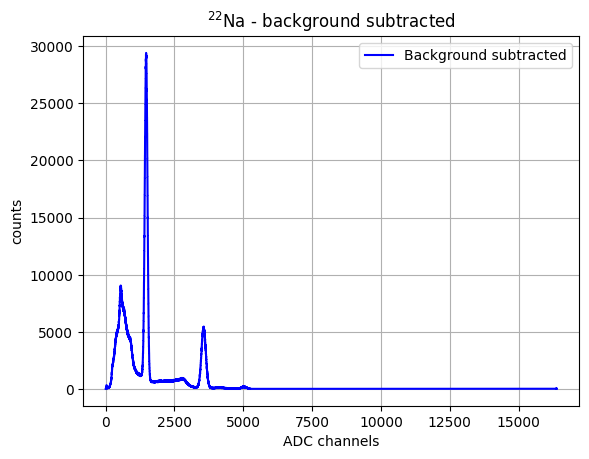

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 3697540.54636566 ± 4780.387316848829
Media = 1469.7140240992871 ± 0.0753701305588071
Sigma = 50.82980298739661 ± 0.07687536497353165
Chi-quadro = 3895.450989216009
Chi-quadro ridotto = 15.771056636502061
Integrale dell'istogramma nel range [1368.0544181244938, 1571.3736300740804] = 3523750


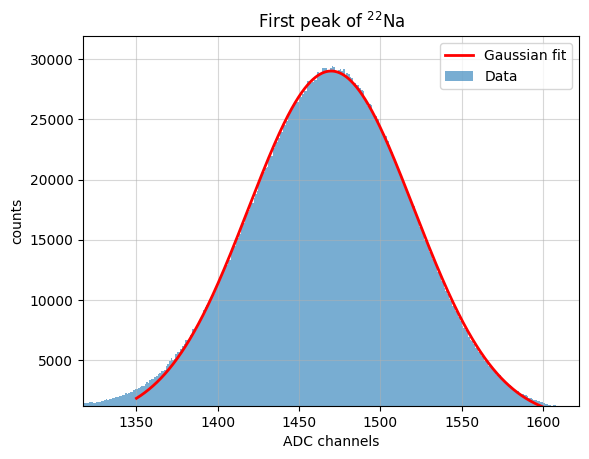

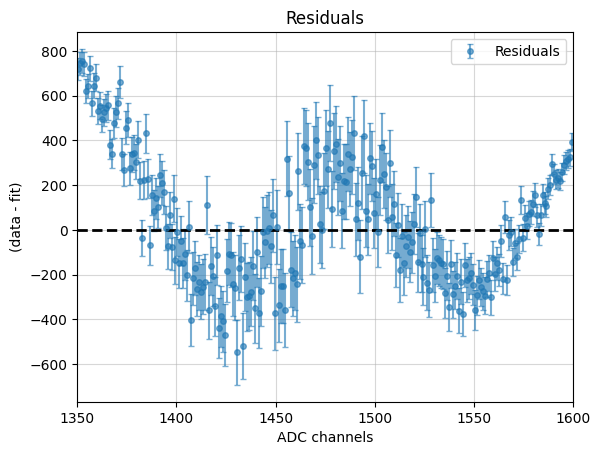

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1070699.0896962592 ± 1446.932123584376
Media = 3559.824076266031 ± 0.1265596219708771
Sigma = 81.14238443964994 ± 0.12673611221669107
Chi-quadro = 4451.403844810062
Chi-quadro ridotto = 8.956546971448816
Integrale dell'istogramma nel range [3397.5393073867313, 3722.108845145331] = 1019322


C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


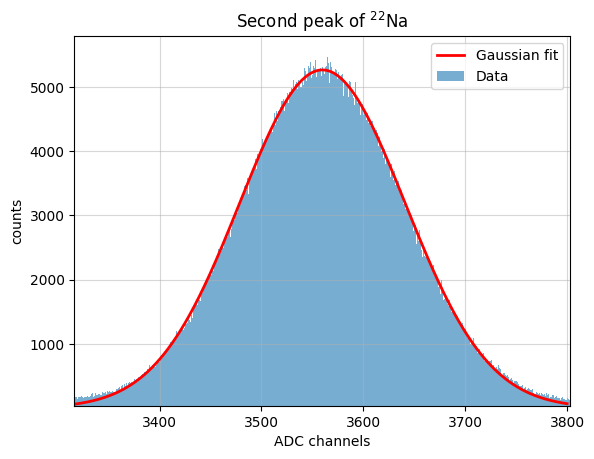

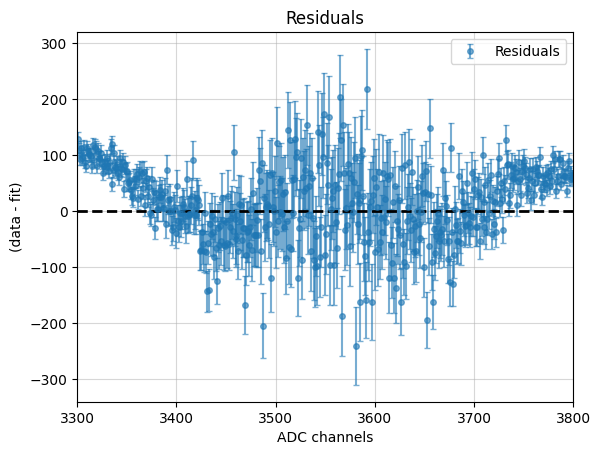

In [6]:
bin_sodio_ch0_corr, hist_sodio_ch0_corr = ben.background(sodio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch0_peak1 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1350, xmax=1600, n=2)
sodioch0_peak2 = ben.normal(bin_centers=bin_sodio_ch0_corr, counts=hist_sodio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=3300, xmax=3800, n=2)

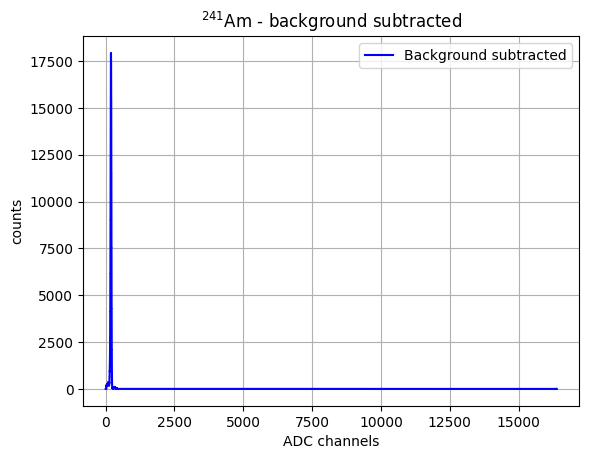

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 611265.8588369272 ± 1292.166211368053
Media = 193.59605381002555 ± 0.03210712039128444
Sigma = 13.619600912786256 ± 0.034822282058693706
Chi-quadro = 391.6391245845033
Chi-quadro ridotto = 5.845360068425422
Integrale dell'istogramma nel range [166.35685198445304, 220.83525563559806] = 600678


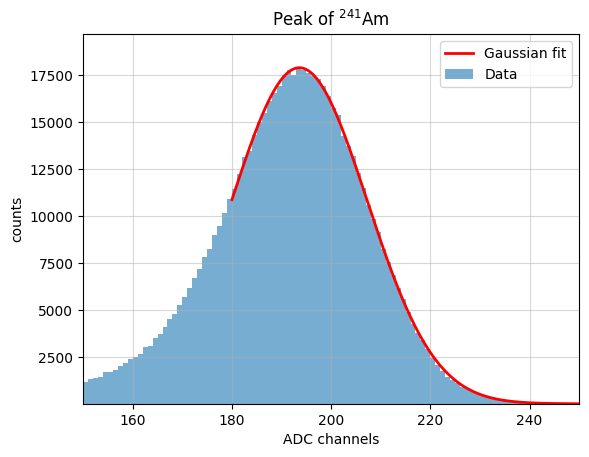

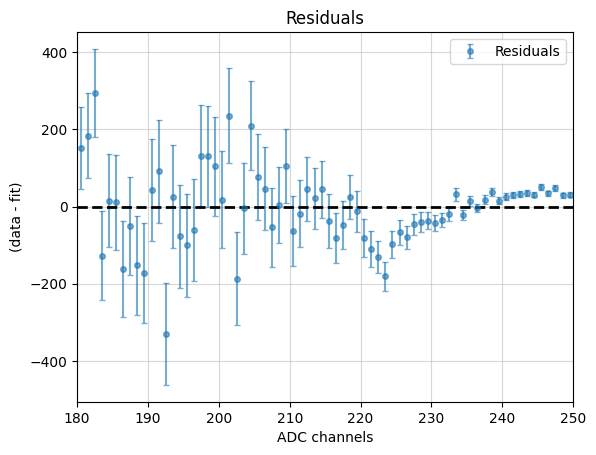

In [7]:
bin_americio_ch0_corr, hist_americio_ch0_corr = ben.background(americio_ch0, fondo2_ch0, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch0_corr, counts=hist_americio_ch0_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=180, xmax=250, x1=150, x2=250, n=2)

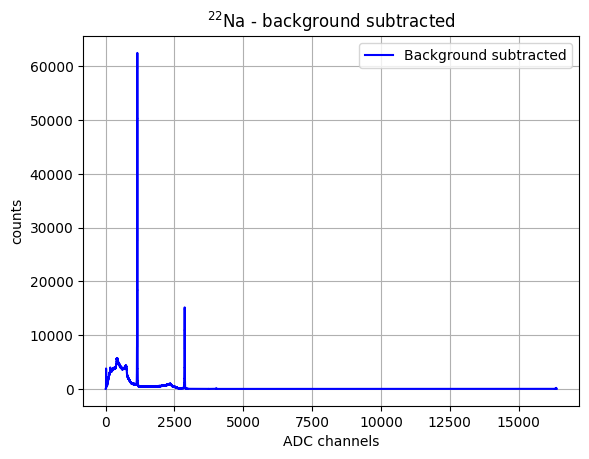

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 836679.8714480074 ± 6553.949955407284
Media = 1150.1190739811584 ± 0.048917544498720225
Sigma = 5.408240035526738 ± 0.0489190199147417
Chi-quadro = 16561.949693705774
Chi-quadro ridotto = 447.6202619920479
Integrale dell'istogramma nel range [1139.3025939101049, 1160.935554052212] = 798039


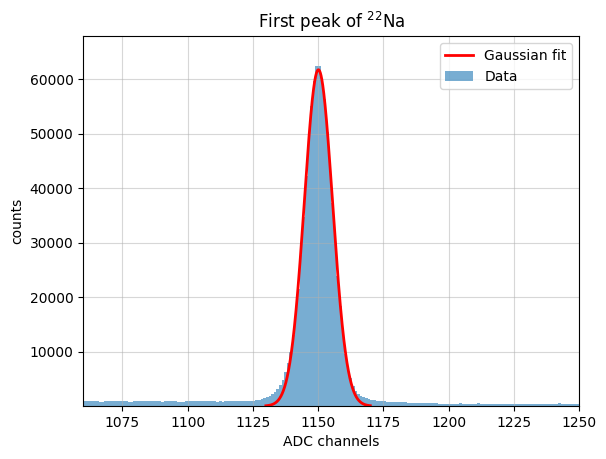

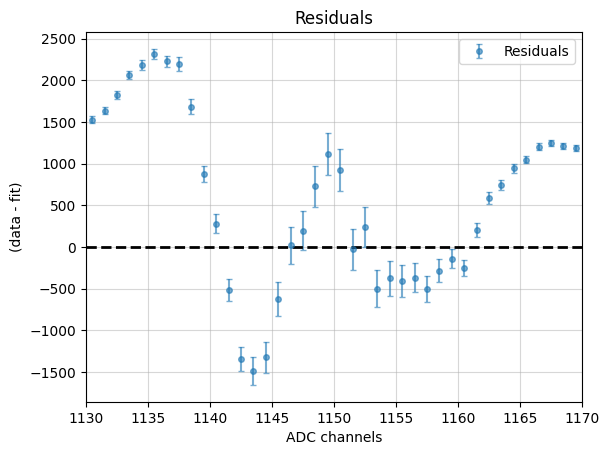

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 190978.337758391 ± 956.4559050421302
Media = 2870.587831088693 ± 0.02835126844172582
Sigma = 5.034503968167342 ± 0.030560946475005107
Chi-quadro = 132.4776789580772
Chi-quadro ridotto = 6.6238839479038605
Integrale dell'istogramma nel range [2860.518823152358, 2880.6568390250277] = 182925


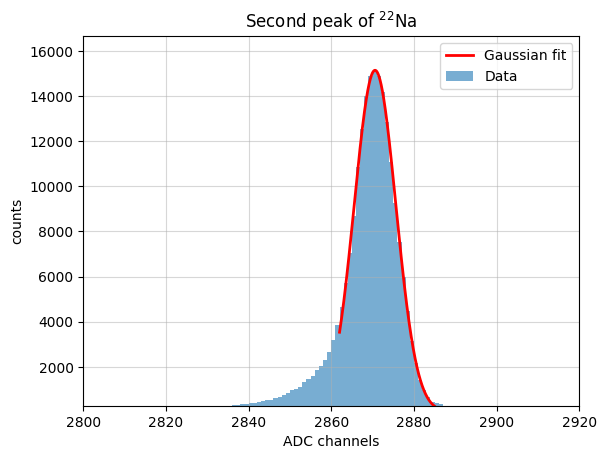

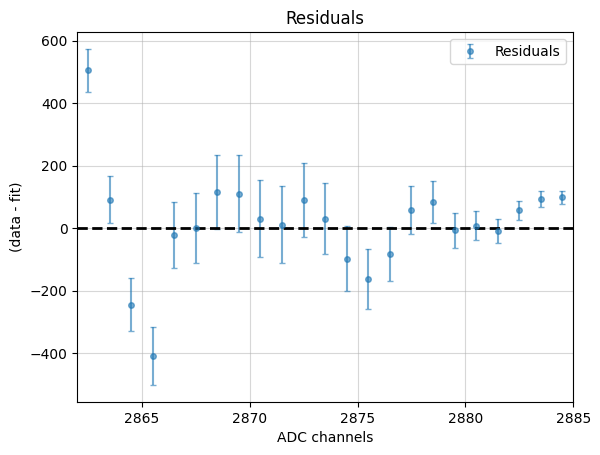

In [8]:
bin_sodio_ch1_corr, hist_sodio_ch1_corr = ben.background(sodio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{22}$Na - background subtracted')
sodioch1_peak1 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='First peak of $^{22}$Na', xmin=1130, xmax=1170, x1=1060, x2=1250, n=2)
sodioch1_peak2 = ben.normal(bin_centers=bin_sodio_ch1_corr, counts=hist_sodio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Second peak of $^{22}$Na', xmin=2862, xmax=2885, x1=2800, x2=2920, n=2)

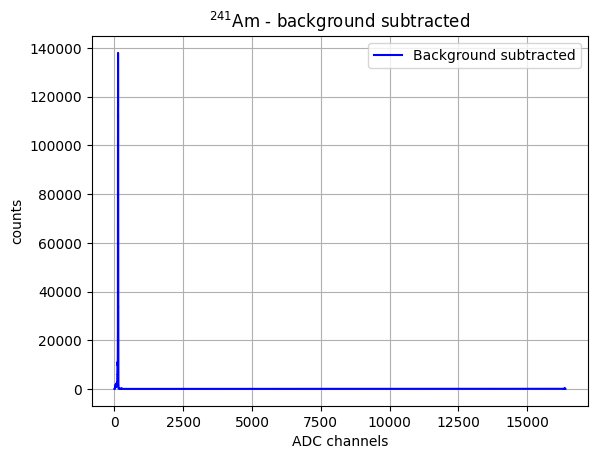

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1438184.809264865 ± 18611.312264671797
Media = 133.22961278832653 ± 0.06285022099686503
Sigma = 4.206616314783794 ± 0.06287530915860237
Chi-quadro = 20578.994281607636
Chi-quadro ridotto = 762.1849733928755
Integrale dell'istogramma nel range [124.81638015875895, 141.64284541789414] = 1372091


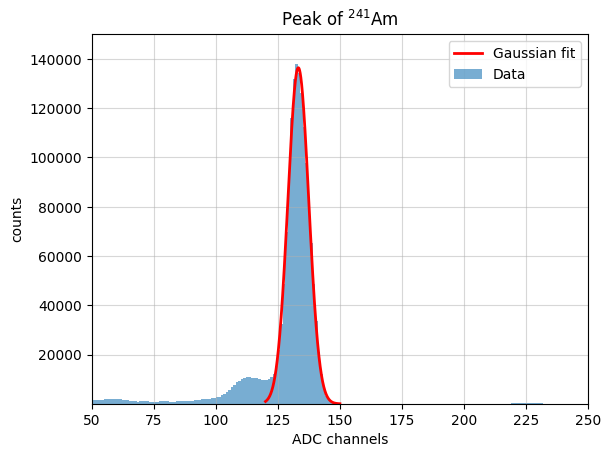

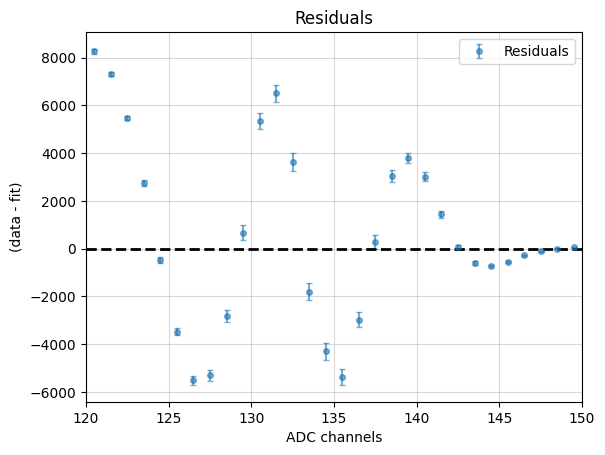

In [9]:
bin_americio_ch1_corr, hist_americio_ch1_corr = ben.background(americio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{241}$Am - background subtracted')
americioch0_peak = ben.normal(bin_centers=bin_americio_ch1_corr, counts=hist_americio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='Peak of $^{241}$Am', xmin=120, xmax=150, x1=50, x2=250, n=2)

### cella di calibrazione

In [10]:
known_energies=np.array([511, 1274.54, 59.54])

ADC_ch0 = np.array([1469.822779, 3559.824076, 193.5960538])
sigma_ADC_ch0 = np.array([0.06195962621, 0.126559622, 0.03210712039])

ADC_ch1 = np.array([1150.119059, 2870.587831, 133.2296128])
sigma_ADC_ch1 = np.array([0.04778742868, 0.02835126844, 0.062850221])

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.3586726295147739 ± 3.325924117807295e-05
Intercetta (q) = -10.796080596613754 ± 0.0344878846738197
Chi-squared = 12885.150979807393
Reduced chi-squared = 12885.150979807393


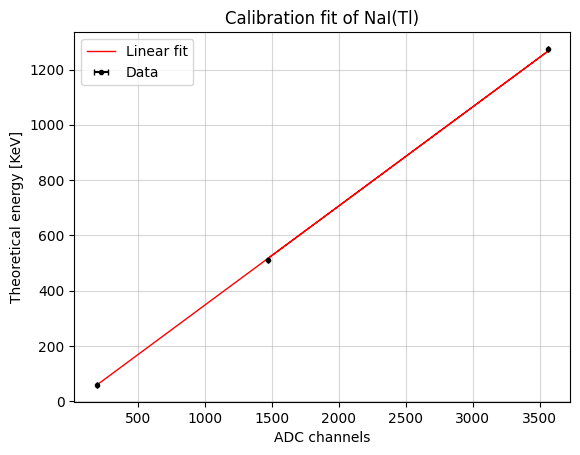

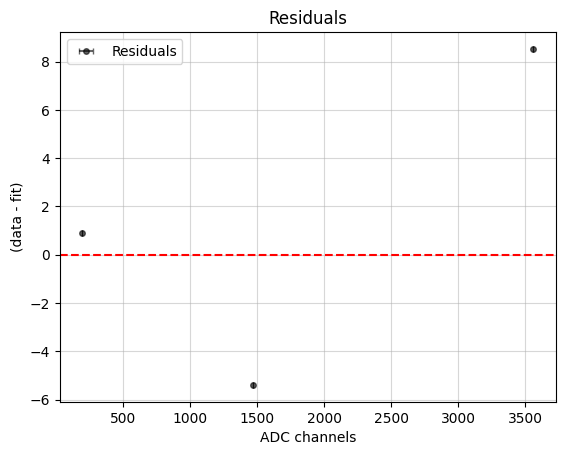

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.4438374481585683 ± 2.175945408741927e-05
Intercetta (q) = 0.4735398622338386 ± 0.05148889989763432
Chi-squared = 2.780665531480684
Reduced chi-squared = 2.780665531480684


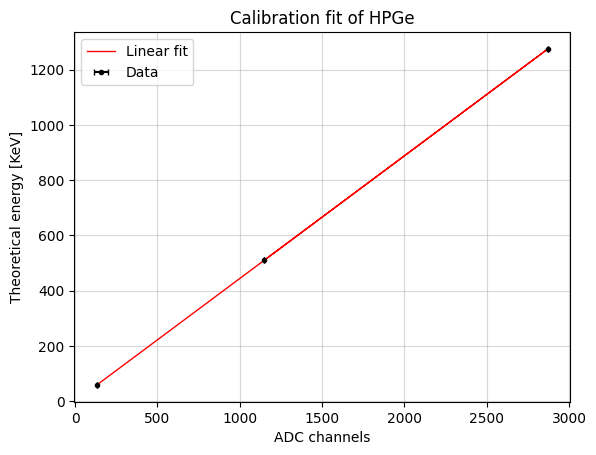

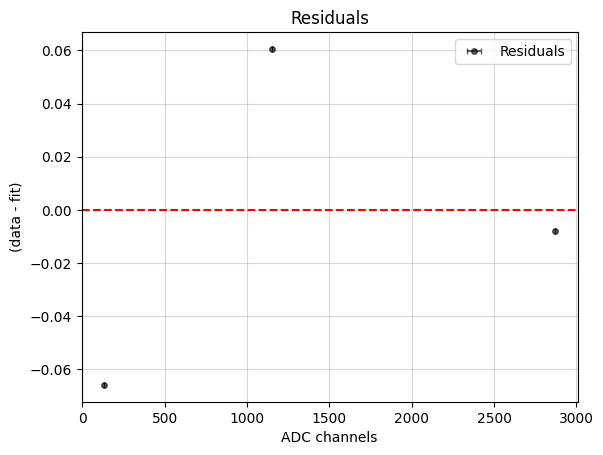

In [28]:
calibrazione_ch0 = ben.linear_regression(x=ADC_ch0, y=known_energies, sx=sigma_ADC_ch0, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of NaI(Tl)')
calibrazione_ch1 = ben.linear_regression(x=ADC_ch1, y=known_energies, sx=sigma_ADC_ch1, xlabel='ADC channels', ylabel='Theoretical energy [KeV]', titolo='Calibration fit of HPGe')

## EFFICIENZA HPGe

### calcolo picchi

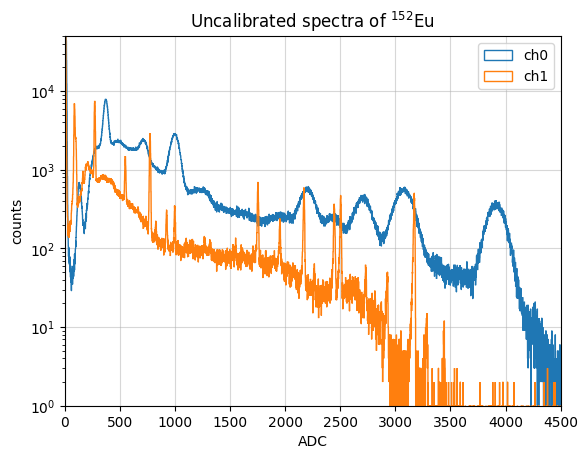

In [29]:
plt.hist(europio_ch0, bins=int(europio_ch0.max()), histtype='step', lw=1, label="ch0"), plt.hist(europio_ch1, bins=int(europio_ch1.max()), histtype='step', lw=1, label="ch1")
plt.title('Uncalibrated spectra of $^{152}$Eu')
plt.legend(loc='upper right')
plt.xlabel("ADC")
plt.ylabel("counts")
plt.xlim(0, 4500)
plt.ylim(1, 50000)
plt.yscale("log")
plt.grid(True, alpha=0.5)
plt.show()

In [30]:
europio1_calib = europio_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]
fondo2_ch1_calib = fondo2_ch1*calibrazione_ch1[0]+calibrazione_ch1[1]

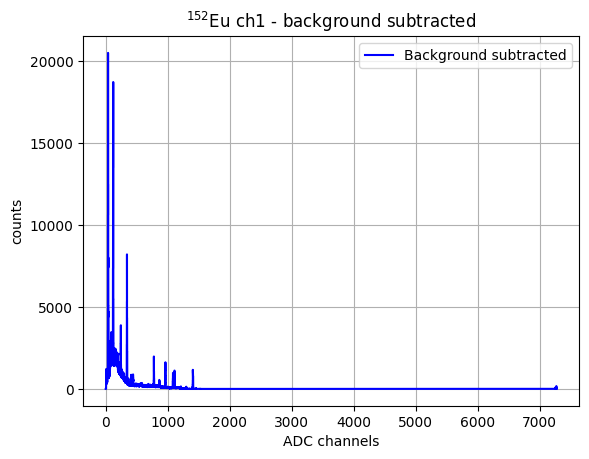

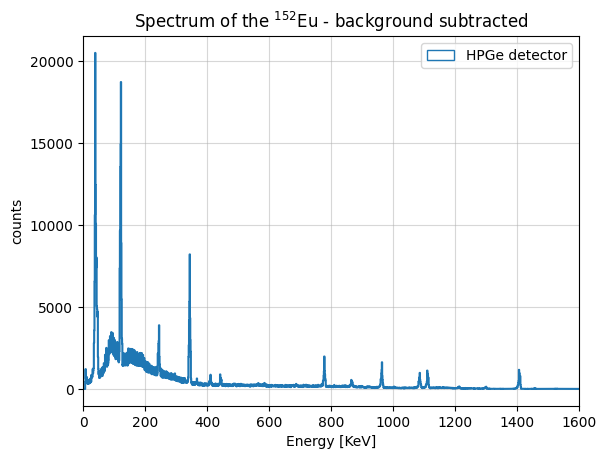

In [31]:
bin_europio_calib, hist_europio_calib = ben.background(europio1_calib, fondo2_ch1_calib, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')
plt.step(bin_europio_calib, hist_europio_calib)
custom_patches = [
    Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='HPGe detector'),
]
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.title('Spectrum of the $^{152}$Eu - background subtracted')
plt.legend(handles=custom_patches)
plt.xlim(0, 1600)
plt.grid(alpha=0.5)
plt.savefig('grafici/efficiency_calibration/Eu_backsubtracted.pdf')
plt.show()


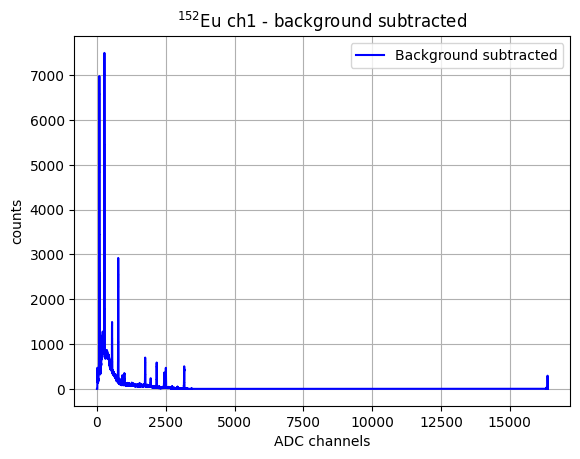

In [32]:
bin_europio_ch1_corr, hist_europio_ch1_corr = ben.background(europio_ch1, fondo2_ch1, None, 'ADC channels', 'counts', '$^{152}$Eu ch1 - background subtracted')

In [33]:
# plt.step(bin_europio_ch0_corr, hist_europio_ch0_corr, color='#1f77b4', lw=1, label='ch0'), plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr, color='orange', lw=1, label='ch1')
# plt.title('Spectra of $^{152}$Eu - background subtracted')
# plt.xlabel("ADC")
# plt.ylabel("counts")
# plt.yscale('log')
# custom_patches = [
#     Patch(edgecolor='#1f77b4', facecolor='none', linewidth=1, label='ch0'),
#     Patch(edgecolor='orange', facecolor='none', linewidth=1, label='ch1'),
# ]
# plt.legend(handles=custom_patches)
# plt.xlim(0, 4500)
# plt.ylim(1, 50000)
# plt.grid(alpha=0.5)
# plt.show()

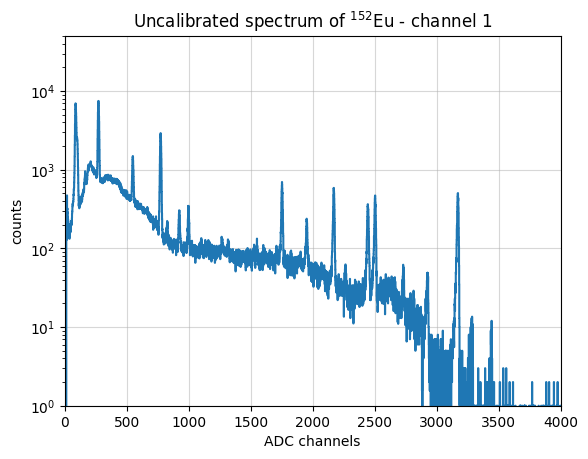

In [34]:
plt.step(bin_europio_ch1_corr, hist_europio_ch1_corr)
plt.xlim(0, 4000)
plt.ylim(1, 50000)
plt.yscale('log')
plt.grid(alpha=0.5)
plt.title('Uncalibrated spectrum of $^{152}$Eu - channel 1')
plt.xlabel('ADC channels')
plt.ylabel('counts')
# plt.axvline(2940, 0, 2000, color='red')
plt.show()

In [36]:
k=2
print(f'-----------------------------------------------')
print(f'Peak 1')
europioch1_peak1 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='1st peak of Eu', xmin=82, xmax=95, n=k)
print(f'Peak 2')
europioch1_peak2 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='2nd peak of Eu', xmin=265, xmax=280, n=k)
print(f'Peak 3')
europioch1_peak3 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='3rd peak of Eu', xmin=540, xmax=560, n=k)
print(f'Peak 4')
europioch1_peak4 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='4th peak of Eu', xmin=765, xmax=785, n=k)
print(f'Peak 5')
europioch1_peak5 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='5th peak of Eu', xmin=917, xmax=932, n=k)
print(f'Peak 6')
europioch1_peak6 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='6th peak of Eu', xmin=990, xmax=1007, n=k)
print(f'Peak 7')
europioch1_peak7 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='7th peak of Eu', xmin=1745, xmax=1765, n=k)
print(f'Peak 8')
europioch1_peak8 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='8th peak of Eu', xmin=1945, xmax=1960, n=k)
print(f'Peak 9')
europioch1_peak9 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='9th peak of Eu', xmin=2165, xmax=2180, n=k)
print(f'Peak 10')
europioch1_peak10 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='10th peak of Eu', xmin=2437, xmax=2455, n=k)
print(f'Peak 11')
europioch1_peak11 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='11th peak of Eu', xmin=2498, xmax=2520, n=k)
print(f'Peak 12')
europioch1_peak12 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='12th peak of Eu', xmin=2725, xmax=2740, n=k)
print(f'Peak 13')
europioch1_peak13 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='13th peak of Eu', xmin=2920, xmax=2935, n=k)
print(f'Peak 14')
europioch1_peak14 = ben.normal_PLOT(bin_centers=bin_europio_ch1_corr, counts=hist_europio_ch1_corr, xlabel='ADC channels', ylabel='counts', titolo='14th peak of Eu', xmin=3160, xmax=3183, n=k)

-----------------------------------------------
Peak 1
Ampiezza = 78736.14806667142 ± 1528.7843590780635
Media = 89.38656911404314 ± 0.08597366589925402
Sigma = 4.522362907206887 ± 0.11417183752350364
Chi-quadro = 101.38524620004905
Chi-quadro ridotto = 10.138524620004905
Integrale dell'istogramma nel range [80.34184329962937, 98.43129492845691] = 77852 ± 279
-----------------------------------------------
Peak 2
Ampiezza = 85073.65338061415 ± 1215.8176716056284
Media = 273.2130881783164 ± 0.06856549364035815
Sigma = 4.570491553309549 ± 0.0835870120859904
Chi-quadro = 104.02428825879782
Chi-quadro ridotto = 8.668690688233152
Integrale dell'istogramma nel range [264.0721050716973, 282.3540712849355] = 81613 ± 285
-----------------------------------------------
Peak 3
Ampiezza = 21343.160149296284 ± 432.3607363236168
Media = 550.2360269592177 ± 0.12834854242925978
Sigma = 6.007492847403818 ± 0.15534233977050915
Chi-quadro = 83.96016645026788
Chi-quadro ridotto = 4.938833320603993
Integra

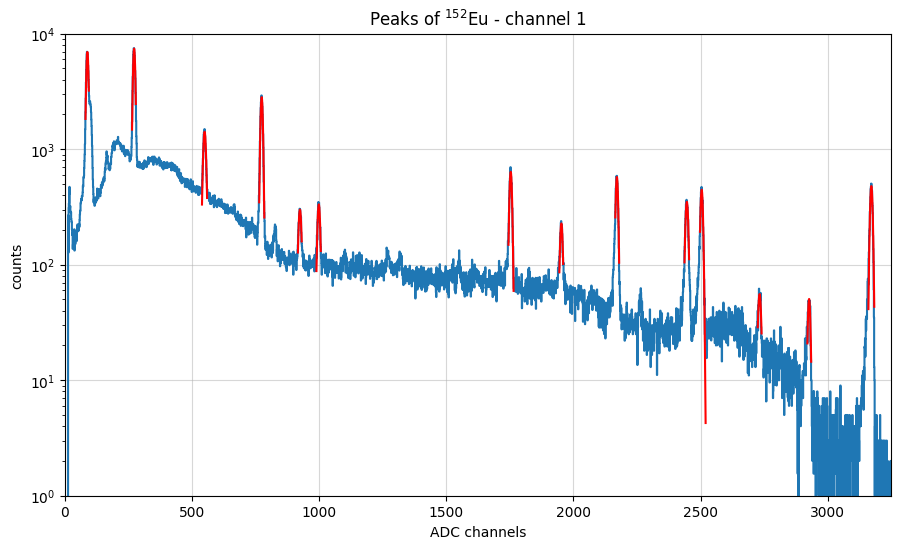

In [37]:
plot_peak1 = europioch1_peak1[5]
plot_peak2 = europioch1_peak2[5]
plot_peak3 = europioch1_peak3[5]
plot_peak4 = europioch1_peak4[5]
plot_peak5 = europioch1_peak5[5]
plot_peak6 = europioch1_peak6[5]
plot_peak7 = europioch1_peak7[5]
plot_peak8 = europioch1_peak8[5]
plot_peak9 = europioch1_peak9[5]
plot_peak10 = europioch1_peak10[5]
plot_peak11 = europioch1_peak11[5]
plot_peak12 = europioch1_peak12[5]
plot_peak13 = europioch1_peak13[5]
plot_peak14 = europioch1_peak14[5]

plt.figure(figsize=(16*2/3, 9*2/3))  # Larghezza = 16, Altezza = 9
plt.step(plot_peak1[0], plot_peak1[1]) #plot dei dati
plt.plot(plot_peak1[2], plot_peak1[3], color='red') #fit 1 picco
plt.plot(plot_peak2[2], plot_peak2[3], color='red') #fit 2 picco
plt.plot(plot_peak3[2], plot_peak3[3], color='red') #fit 3 picco
plt.plot(plot_peak4[2], plot_peak4[3], color='red') #fit 4 picco
plt.plot(plot_peak5[2], plot_peak5[3], color='red') #fit 5 picco
plt.plot(plot_peak6[2], plot_peak6[3], color='red') #fit 6 picco
plt.plot(plot_peak7[2], plot_peak7[3], color='red') #fit 7 picco
plt.plot(plot_peak8[2], plot_peak8[3], color='red') #fit 8 picco
plt.plot(plot_peak9[2], plot_peak9[3], color='red') #fit 9 picco
plt.plot(plot_peak10[2], plot_peak10[3], color='red') #fit 10 picco
plt.plot(plot_peak11[2], plot_peak11[3], color='red') #fit 11 picco
plt.plot(plot_peak12[2], plot_peak12[3], color='red') #fit 12 picco
plt.plot(plot_peak13[2], plot_peak13[3], color='red') #fit 13 picco
plt.plot(plot_peak14[2], plot_peak14[3], color='red') #fit 14 picco
plt.xlim(0, 3250)
# plt.xlim(2600, 2800)
plt.ylim(1, 1e+4)
plt.grid(alpha=0.5)
plt.yscale('log')
plt.title('Peaks of $^{152}$Eu - channel 1')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.show()

### calcolo parametri efficienza

In [44]:
'''a partire dall'attività del 1/12/1990 (395 kBq) e da quella di settembre 2022 (74.7 kBq) calcoliamo l'attività odierna: '''
a1 = 395 #attività iniziale
a2 = 74.7 #attività a settembre 2022
delta = 11597*24*60*60 #delta di tempo 1990-2022
cost = -np.log(a2/a1)/(delta) #costante di decadimento
deltaf = 811*24*60*60 #tempo tra 1/9/2022 e 20/11/2024
af = a2*np.exp(-cost*deltaf) #attività al 10/11/2024
print(f'costante di decadimento \u03BB: {cost}\nattività al 20/11/2024: {af}')

'''l'angolo solido è dato da: sin^2(arctan(r/d)/2)
dove r è il raggio del detector e d è la distanza della sorgente dal detector'''
r = 1.9544 #cm
d = 20.8 #cm
alfa = (np.sin(np.arctan(r/d)/2))**2
print('--------------------------------------------------------')
print(f'angolo solido è \u03B1 = {alfa}')

costante di decadimento λ: 1.6621133586215925e-09
attività al 20/11/2024: 66.48757873363837
--------------------------------------------------------
angolo solido è α = 0.0021926842826392222


In [47]:
'''qua mettiamo l'integral dei picchi e le ripesttive abundances'''
picchi = [europioch1_peak1, europioch1_peak2, europioch1_peak3, europioch1_peak4, europioch1_peak5, europioch1_peak6, europioch1_peak7, 
                   europioch1_peak8, europioch1_peak9, europioch1_peak10, europioch1_peak11, europioch1_peak12, europioch1_peak13, europioch1_peak14]

photons = []
energies = []
energies_err = []

for i, elemento in enumerate(picchi):
    if i > 0:
        photons.append(elemento[6])
        energies.append(elemento[0][1]*calibrazione_ch1[0]+calibrazione_ch1[1])
        energies_err.append((elemento[0][1]**2)*(calibrazione_ch1[2]**2)+(elemento[1][1]**2)*(calibrazione_ch1[0]**2)+calibrazione_ch1[1]**2)

photons = np.array(photons)
energies = np.array(energies)
energies_err = np.array(energies_err)

for i in range(len(energies)):
    print(f'picco {i} = {energies[i]} keV')

Irel = np.array([141, 36.6, 127.2, 10.71, 15.00, 62.6, 20.54, 70.4, 48.7, 65.0, 6.67, 7.76, 100.0])
eff_rel = (photons*Irel[12])/(photons[12]*Irel)
abundances = np.array([0.2841, 0.0755, 0.2659, 0.02238, 0.028, 0.1297, 0.04243, 0.145, 0.1013, 0.1341, 0.01416, 0.01633, 0.2085])
abundances_err = np.array([0.0013, 0.0004, 0.0012, 0.0001, 0.0002, 0.0006, 0.00023, 0.0006, 0.0006, 0.0006, 0.00009, 0.00009, 0.0008])
t = 1195.729 #tempo di acquisizione
effs = photons/(af*t*abundances*alfa)


picco 0 = 121.73573972281969 keV
picco 1 = 244.68889395272222 keV
picco 2 = 344.2979287391655 keV
picco 3 = 411.05076731219634 keV
picco 4 = 443.98192568899435 keV
picco 5 = 778.86745471796 keV
picco 6 = 867.2205390550682 keV
picco 7 = 964.0932607678609 keV
picco 8 = 1086.1533897572829 keV
picco 9 = 1112.0890217290032 keV
picco 10 = 1213.1173000109025 keV
picco 11 = 1299.5213513263413 keV
picco 12 = 1408.128478113193 keV


In [52]:
# plt.errorbar(energies, eff_rel, xerr=energies_err, fmt='o', markersize=3, capsize=2, color='black', label='relative efficiency')

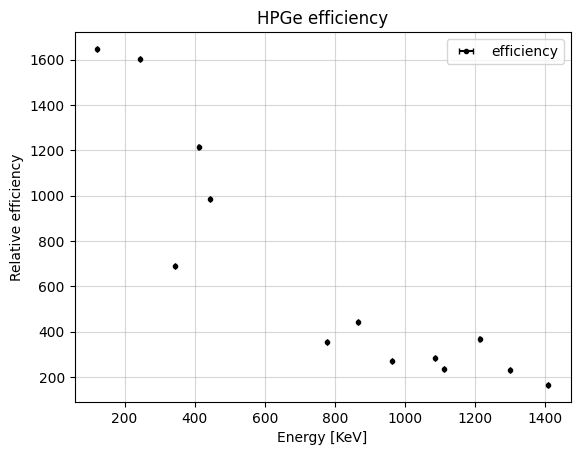

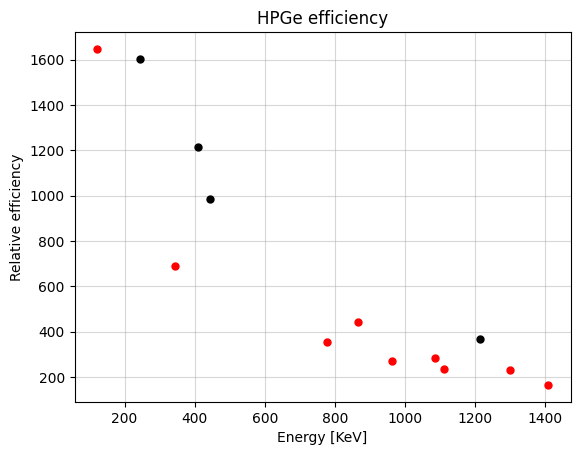

In [53]:
plt.errorbar(energies, effs, xerr=energies_err, fmt='o', markersize=3, capsize=2, color='black', label='efficiency')
plt.title('HPGe efficiency')
plt.ylabel('Relative efficiency')
plt.xlabel('Energy [KeV]')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


indices = [0, 2, 5, 6, 7, 8, 9, 11, 12]
energies_selected = energies[indices]
effs_selected = effs[indices]

mask = np.ones(len(energies), dtype=bool)  # Inizialmente tutto True
mask[indices] = False 
energies_rej = energies[mask]
effs_rej = effs[mask]

plt.errorbar(energies_selected, effs_selected, fmt='o', markersize=5, color='red'), plt.errorbar(energies_rej, effs_rej, fmt='o', markersize=5, color='black')
plt.title('HPGe efficiency')
plt.ylabel('Relative efficiency')
plt.xlabel('Energy [KeV]')
plt.grid(alpha=0.5)
plt.show()